<a href="https://colab.research.google.com/github/Tradergurl/final_project/blob/main/News_category_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

pd.set_option('max_colwidth',400)

In [2]:
df=pd.read_json('/.../News_Category_Dataset_v2.json',lines=True)

# Work on the dataframe

In [3]:
df=df.drop(columns=['link','date','authors'])


In [4]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [5]:
def change_category(new_category, category_to_change):
  df.category = df.category.map(lambda x: new_category if x == category_to_change else x)

In [6]:
change_category('WORLDPOST','THE WORLDPOST')
change_category('WORLDPOST','WORLD NEWS')
change_category('ARTS & CULTURE','CULTURE & ARTS')
change_category('ARTS & CULTURE','ARTS')
change_category('STYLE & BEAUTY','STYLE')
change_category('ENTERTAINMENT','COMEDY')
change_category('FOOD & DRINK','TASTE')
change_category('ENVIRONMENT','GREEN')
change_category('WELLNESS','HEALTHY LIVING')

In [7]:
categories_to_drop=['LATINO VOICES','GOOD NEWS','FIFTY','RELIGION','WEIRD NEWS','DIVORCE','WOMEN','WEDDINGS','BLACK VOICES','QUEER VOICES','PARENTS','PARENTING','EDUCATION','COLLEGE']

In [8]:
df=df[df.category.isin(categories_to_drop)==False]
df.reset_index(inplace=True)

In [9]:
df.category.value_counts()

POLITICS          32739
WELLNESS          24521
ENTERTAINMENT     21233
STYLE & BEAUTY    11903
TRAVEL             9887
WORLDPOST          8420
FOOD & DRINK       8322
BUSINESS           5937
SPORTS             4884
HOME & LIVING      4195
ENVIRONMENT        3945
ARTS & CULTURE     3878
IMPACT             3459
CRIME              3405
MEDIA              2815
SCIENCE            2178
TECH               2082
MONEY              1707
Name: category, dtype: int64

In [10]:
df['text'] = df.headline+' '+df.short_description


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155510 entries, 0 to 155509
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   index              155510 non-null  int64 
 1   category           155510 non-null  object
 2   headline           155510 non-null  object
 3   short_description  155510 non-null  object
 4   text               155510 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.9+ MB


In [12]:
df.drop(columns=['index','headline','short_description'],inplace=True)

# Wordcloud per category

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
df['cat']=df['category'].apply(lambda x:['No category'] if str(x)=='NaN' else str(x))

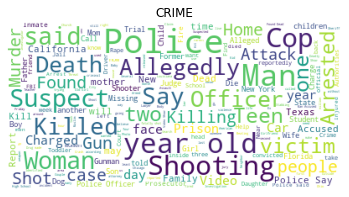

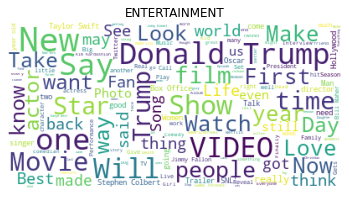

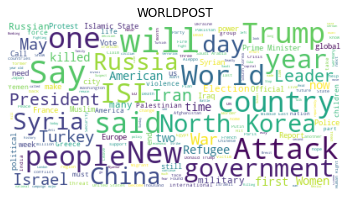

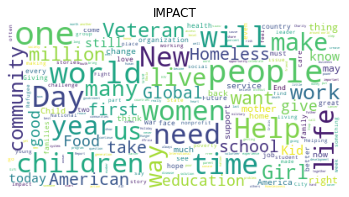

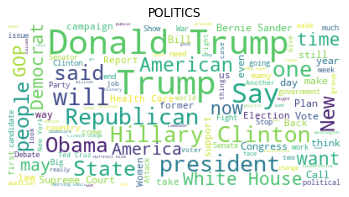

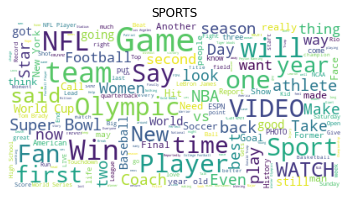

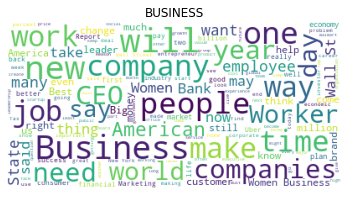

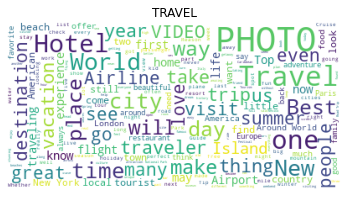

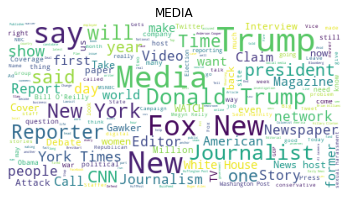

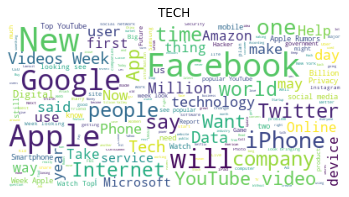

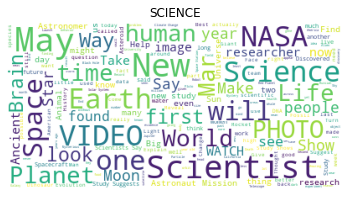

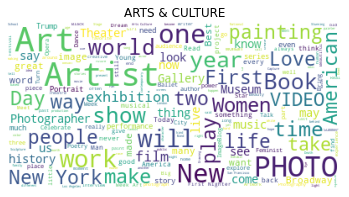

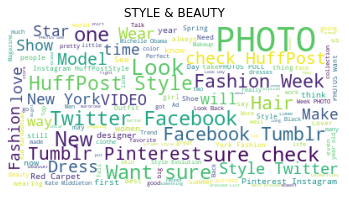

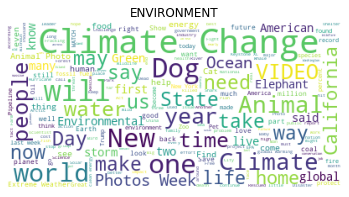

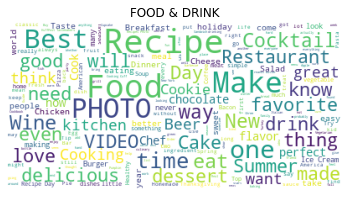

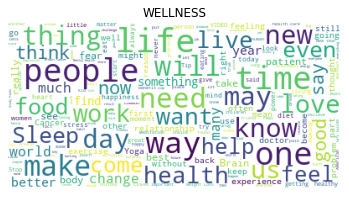

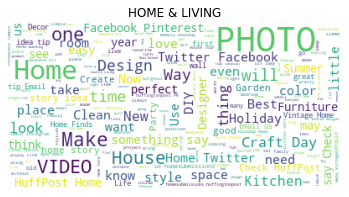

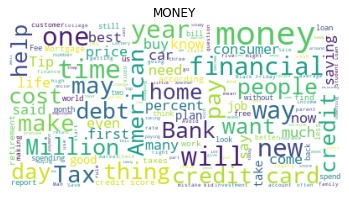

In [15]:
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.cat.unique():
	wc = WordCloud(background_color="white", max_words=200, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc.generate(df.text[(df.text.notnull()) & (df.cat == x)].to_string())
	plt.imshow(wc)
	plt.title(x)
	plt.axis("off")
	plt.show()

# Work on text column

In [16]:
all_text=df['text'].values.tolist()

In [17]:
def clean_text(data):
  data=[word.lower() for word in data]
  data=[word.replace('new york','newyork') for word in data]
  #data=[word.replace('south korea','southkorea') for word in data]
  #data=[word.replace('north korea','northkorea') for word in data]
  data=[word.replace('the us','theus') for word in data]
  data=[word.replace('the u.s.','theus') for word in data]
  data=[word.replace('\'s','') for word in data]
  data=[word.replace('\'re','') for word in data]
  data=[word.replace('\'m','') for word in data]
  data=[word.replace('\'ll','') for word in data]
  data=[word.replace('\'ve','') for word in data]
  data=[word.replace('\'d','') for word in data]
  data=[word.replace('\'t','') for word in data]
  data=[re.sub(r'[^a-z ]','',word) for word in data]
  data = [word.replace('  ',' ') for word in data]

  return data
 

In [18]:
all_text = clean_text(all_text)

In [19]:
all_text[14]

'rump son should be concerned fbi obtained wiretaps of putin ally who met with trump jr the wiretaps feature conversations between alexander torshin and alexander romanov a convicted russian money launderer'

# Tokenization


In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
headlines_nlp=list(nlp.pipe(all_text))

In [22]:
headlines_nlp[:5]

[there were mass shootings in texas last week but only on tv she left her husband he killed their children just another day in america,
 will smith joins diplo and nicky jam for the world cup official song of course it has a song,
 hugh grant marries for the first time at age the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony,
 jim carrey blasts castrato adam schiff and democrats in new artwork the actor gives dems an asskicking for not fighting hard enough against donald trump,
 julianna margulies uses donald trump poop bags to pick up after her dog the dietland actress said using the bags is a really cathartic therapeutic moment]

In [23]:
text_lemma= [[word.lemma_ for word in element if not word.is_stop]for element in headlines_nlp]

In [24]:
text_lemma[:3]

[['mass',
  'shooting',
  'texas',
  'week',
  'tv',
  'leave',
  'husband',
  'kill',
  'child',
  'day',
  'america'],
 ['smith',
  'join',
  'diplo',
  'nicky',
  'jam',
  'world',
  'cup',
  'official',
  'song',
  'course',
  'song'],
 ['hugh',
  'grant',
  'marrie',
  'time',
  'age',
  'actor',
  'longtime',
  'girlfriend',
  'anna',
  'eberstein',
  'tie',
  'knot',
  'civil',
  'ceremony']]

In [25]:
text_lemma=[' '.join(element) for element in text_lemma]

# Vectorization

In [42]:
import itertools

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

## Bag of words

In [27]:
bow=CountVectorizer(min_df=5, max_df=0.3)
bow2=CountVectorizer(min_df=5,max_df=0.3,ngram_range=(1,2))

In [28]:
bow.fit(text_lemma)
text_bow=bow.transform(text_lemma)
bow2.fit(text_lemma)
text_bow2=bow2.transform(text_lemma)

In [29]:
text_bow.shape

(155510, 22666)

## Tfidf

In [30]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.3,  ngram_range=(1,1), sublinear_tf=True, norm='l2',stop_words='english')
tfidf2=TfidfVectorizer(min_df=5, max_df=0.3,  ngram_range=(1,2) ,sublinear_tf=True, norm='l2',stop_words='english')

In [31]:
text_tfidf=tfidf.fit_transform(text_lemma)
text_tfidf2=tfidf2.fit_transform(text_lemma)

# Naive Bayes

In [32]:
nb_model= MultinomialNB()

### Bag of words ngram range(1,1)

In [33]:
X_train,X_test,y_train,y_test= train_test_split(text_bow,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [34]:
nb_model= MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [35]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_bow_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7900833390493175
ACC test set: 0.7304130870929575


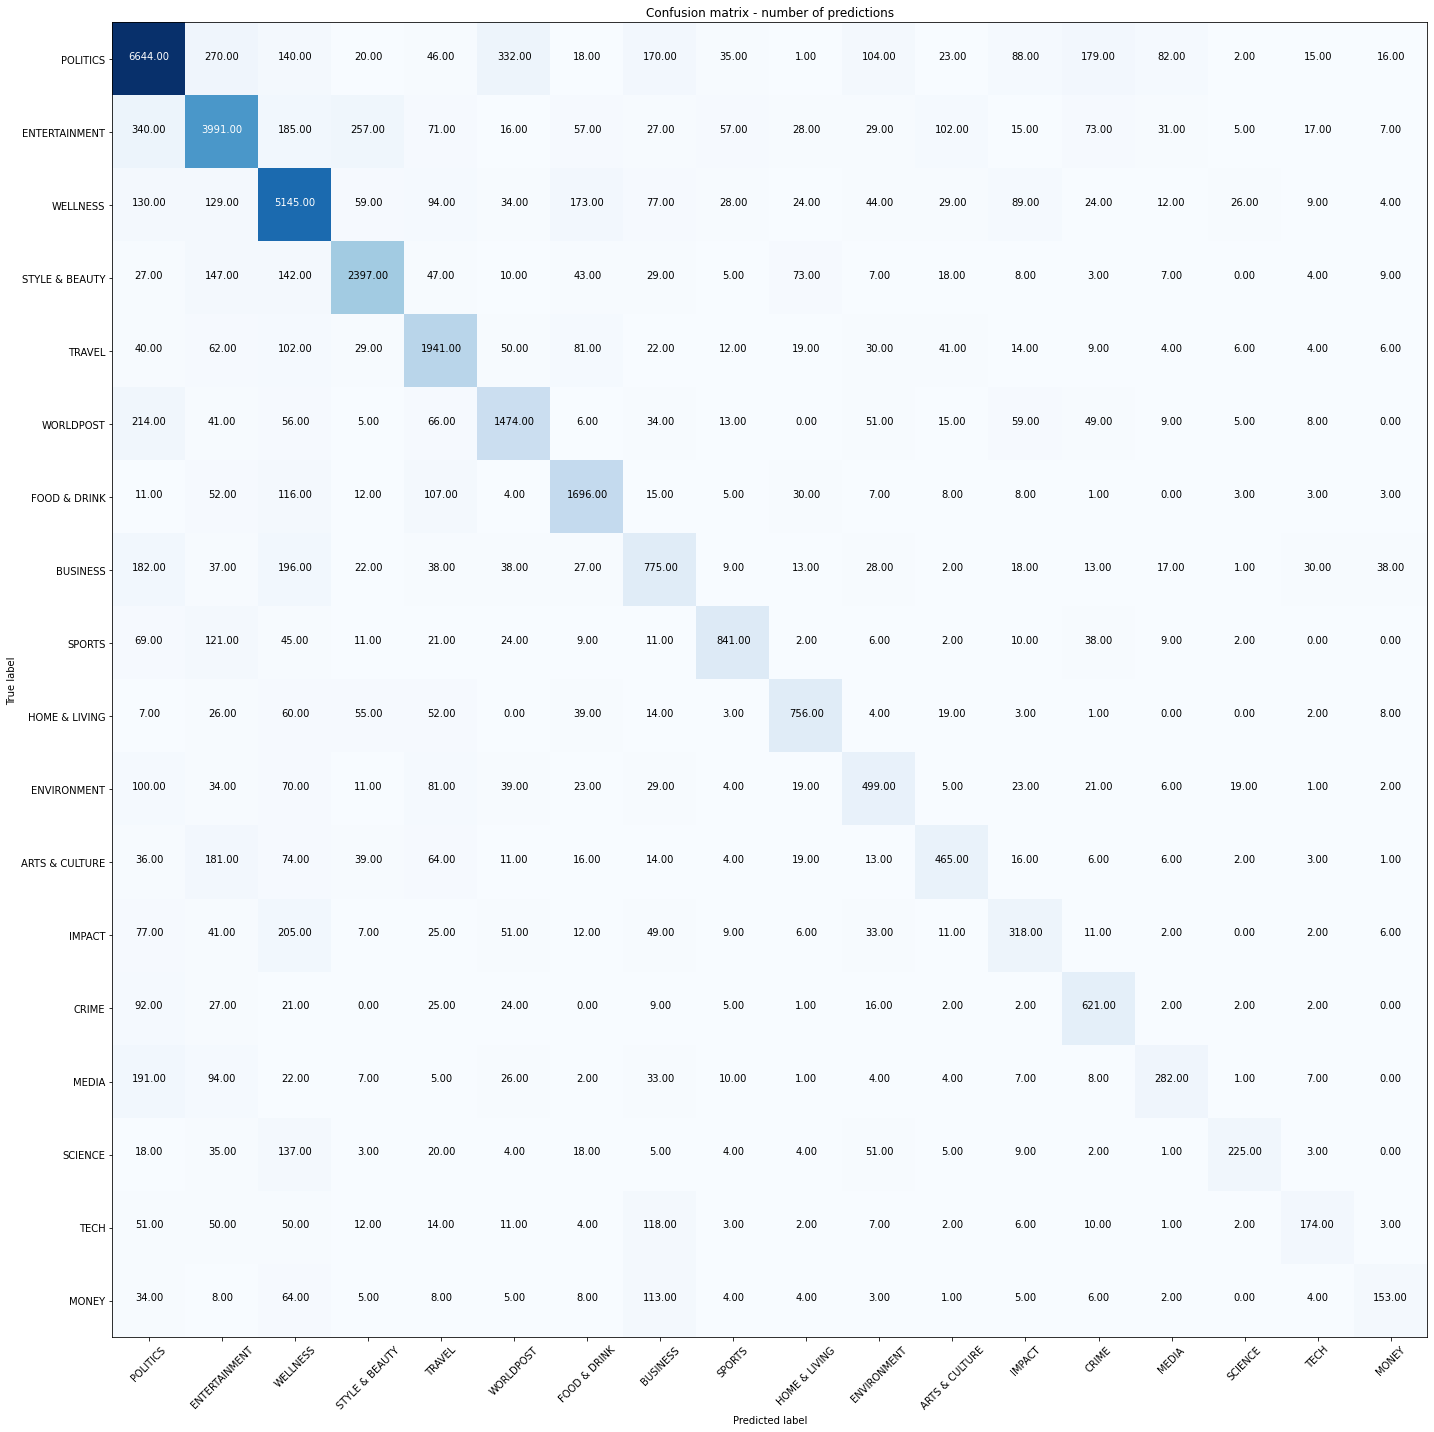

In [36]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

###Bag of words ngram range(1,2)

In [37]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [38]:
nb_model= MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [39]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow2_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_bow2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8124785650593319
ACC test set: 0.7362775862955914


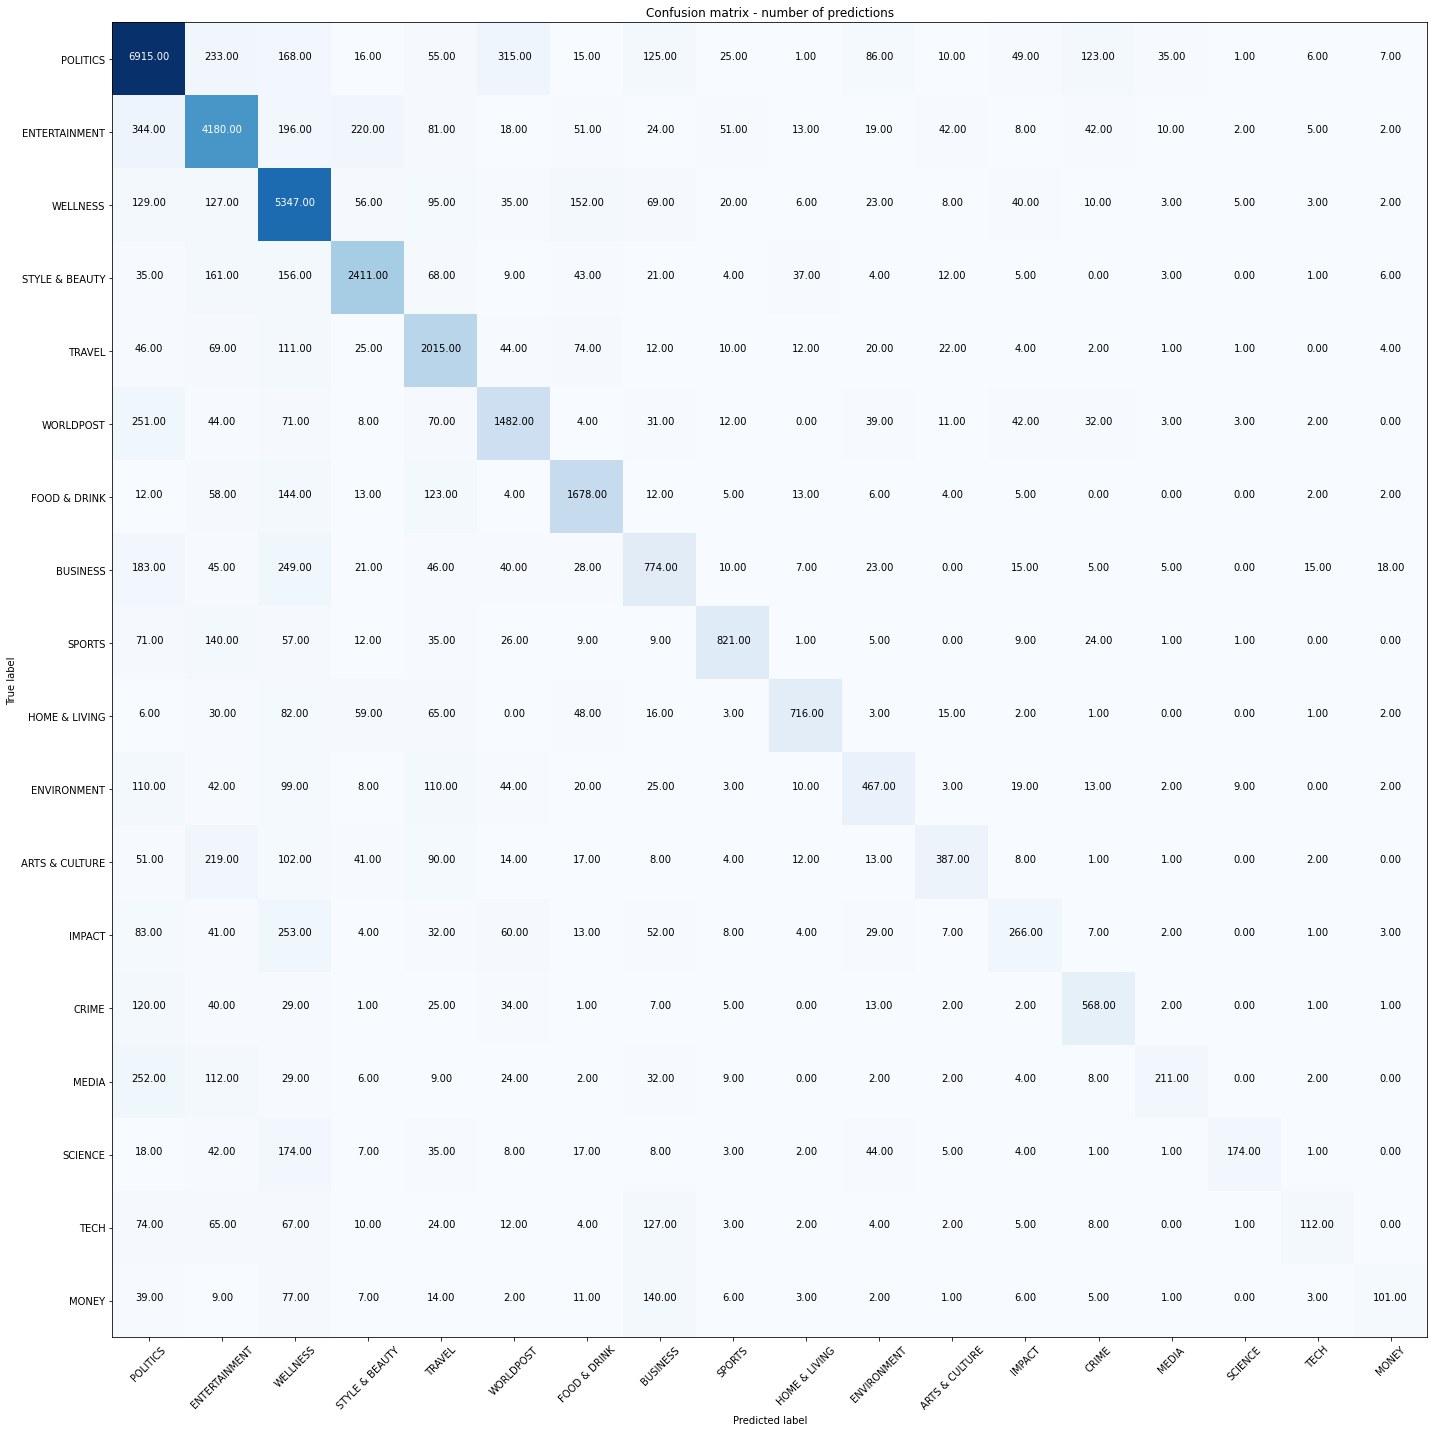

In [40]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Stratified kfold

In [43]:
#stratified kfold for bag of words ngram range (1,2)
X, y = text_bow2, df['category']
metrics_train = []
metrics_test = []

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    nb_model.fit(X_train, y_train)
    y_pred_train= nb_model.predict(X_train)
    y_pred = nb_model.predict(X_test)

    metrics_train.append(accuracy_score(y_train,y_pred_train))
    metrics_test.append(accuracy_score(y_test, y_pred))

metrics_train = np.array(metrics_train)
metrics_test = np.array(metrics_test)
print('Mean accuracy train: ', np.mean(metrics_train, axis=0))
print('Std for accuracy: ', np.std(metrics_train, axis=0))
print('Mean accuracy test: ', np.mean(metrics_test, axis=0))
print('Std for accuracy: ', np.std(metrics_test, axis=0))

Mean accuracy train:  0.8135328917754485
Std for accuracy:  0.0032694767433845643
Mean accuracy test:  0.715471673847341
Std for accuracy:  0.01918139621594794


##Tfidf ngram range (1,1)

In [44]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [45]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_tfidf_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_tfidf_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.6875042869881336
ACC test set: 0.6494675652039714


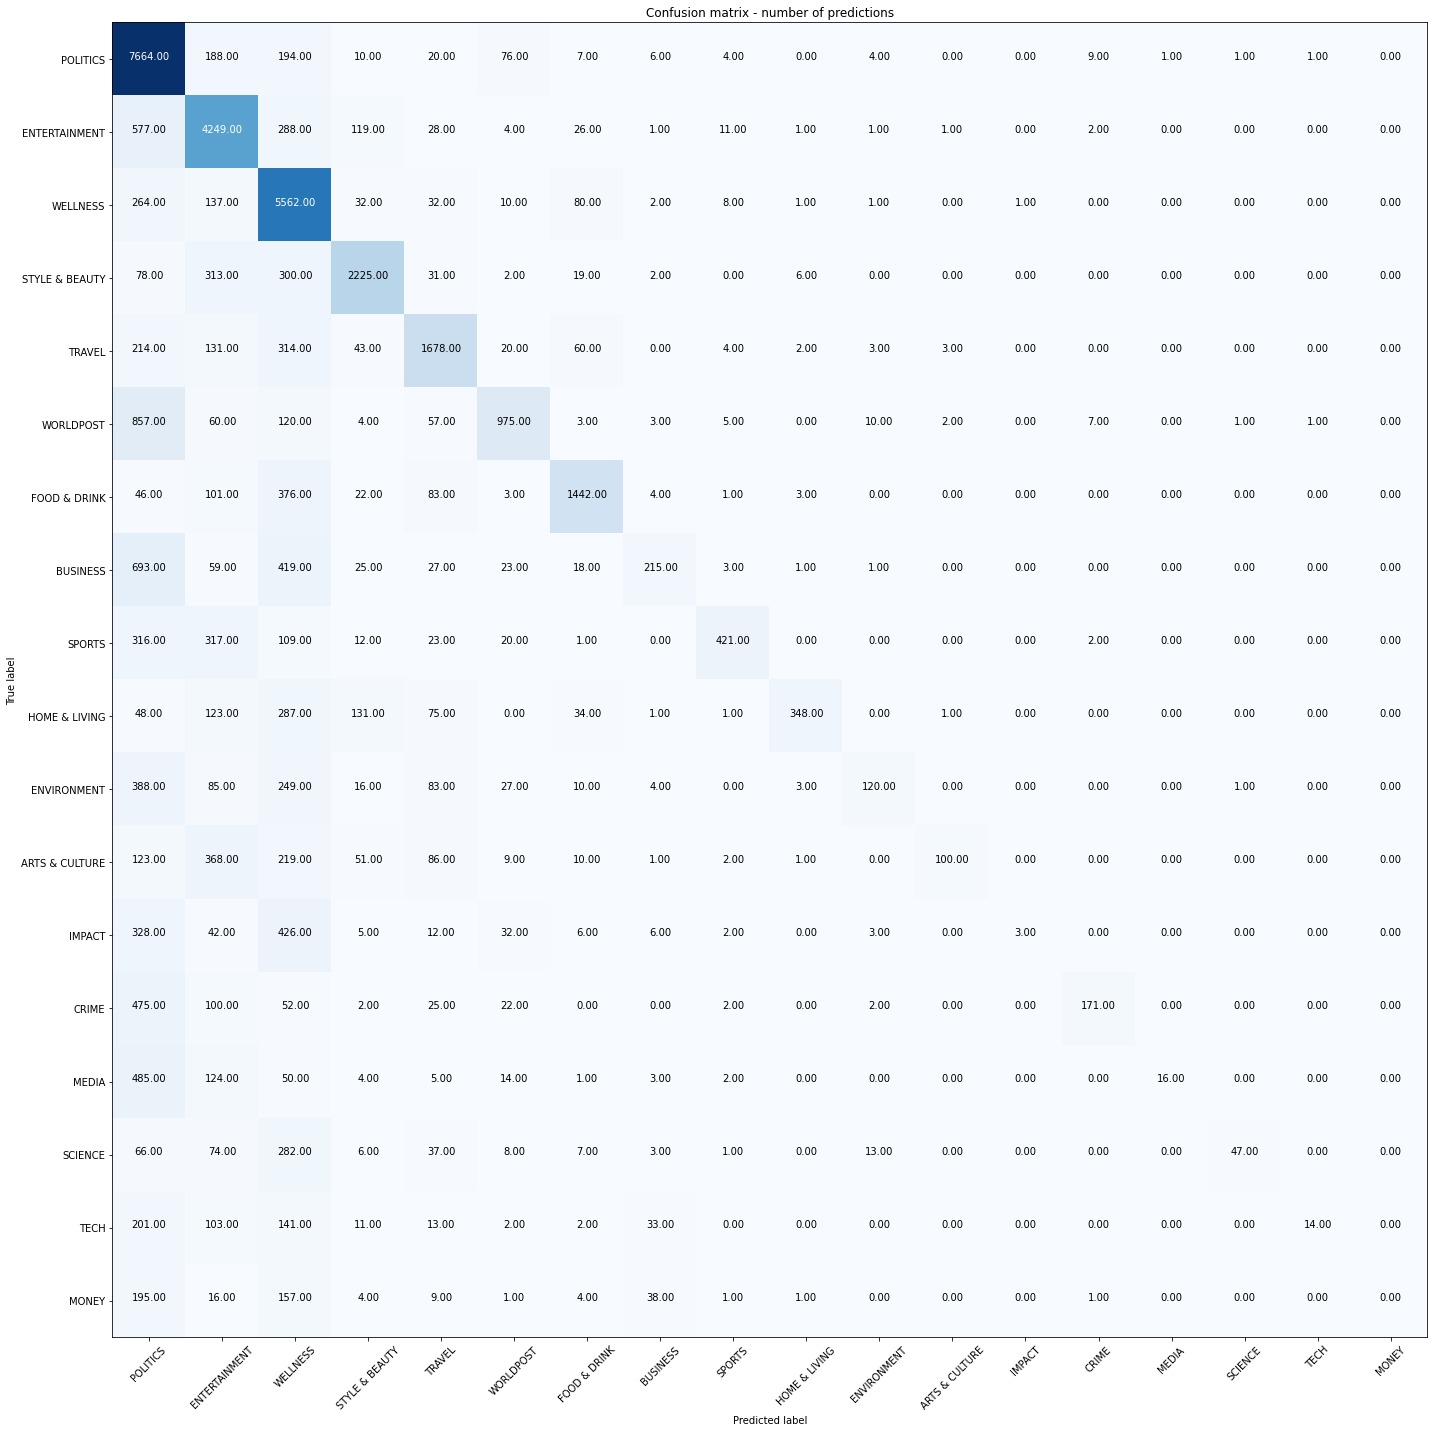

In [47]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Tfidf ngram range(1,2)

In [48]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [49]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_tfidf2_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_tfidf2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.6737773509842925
ACC test set: 0.6323627758629559


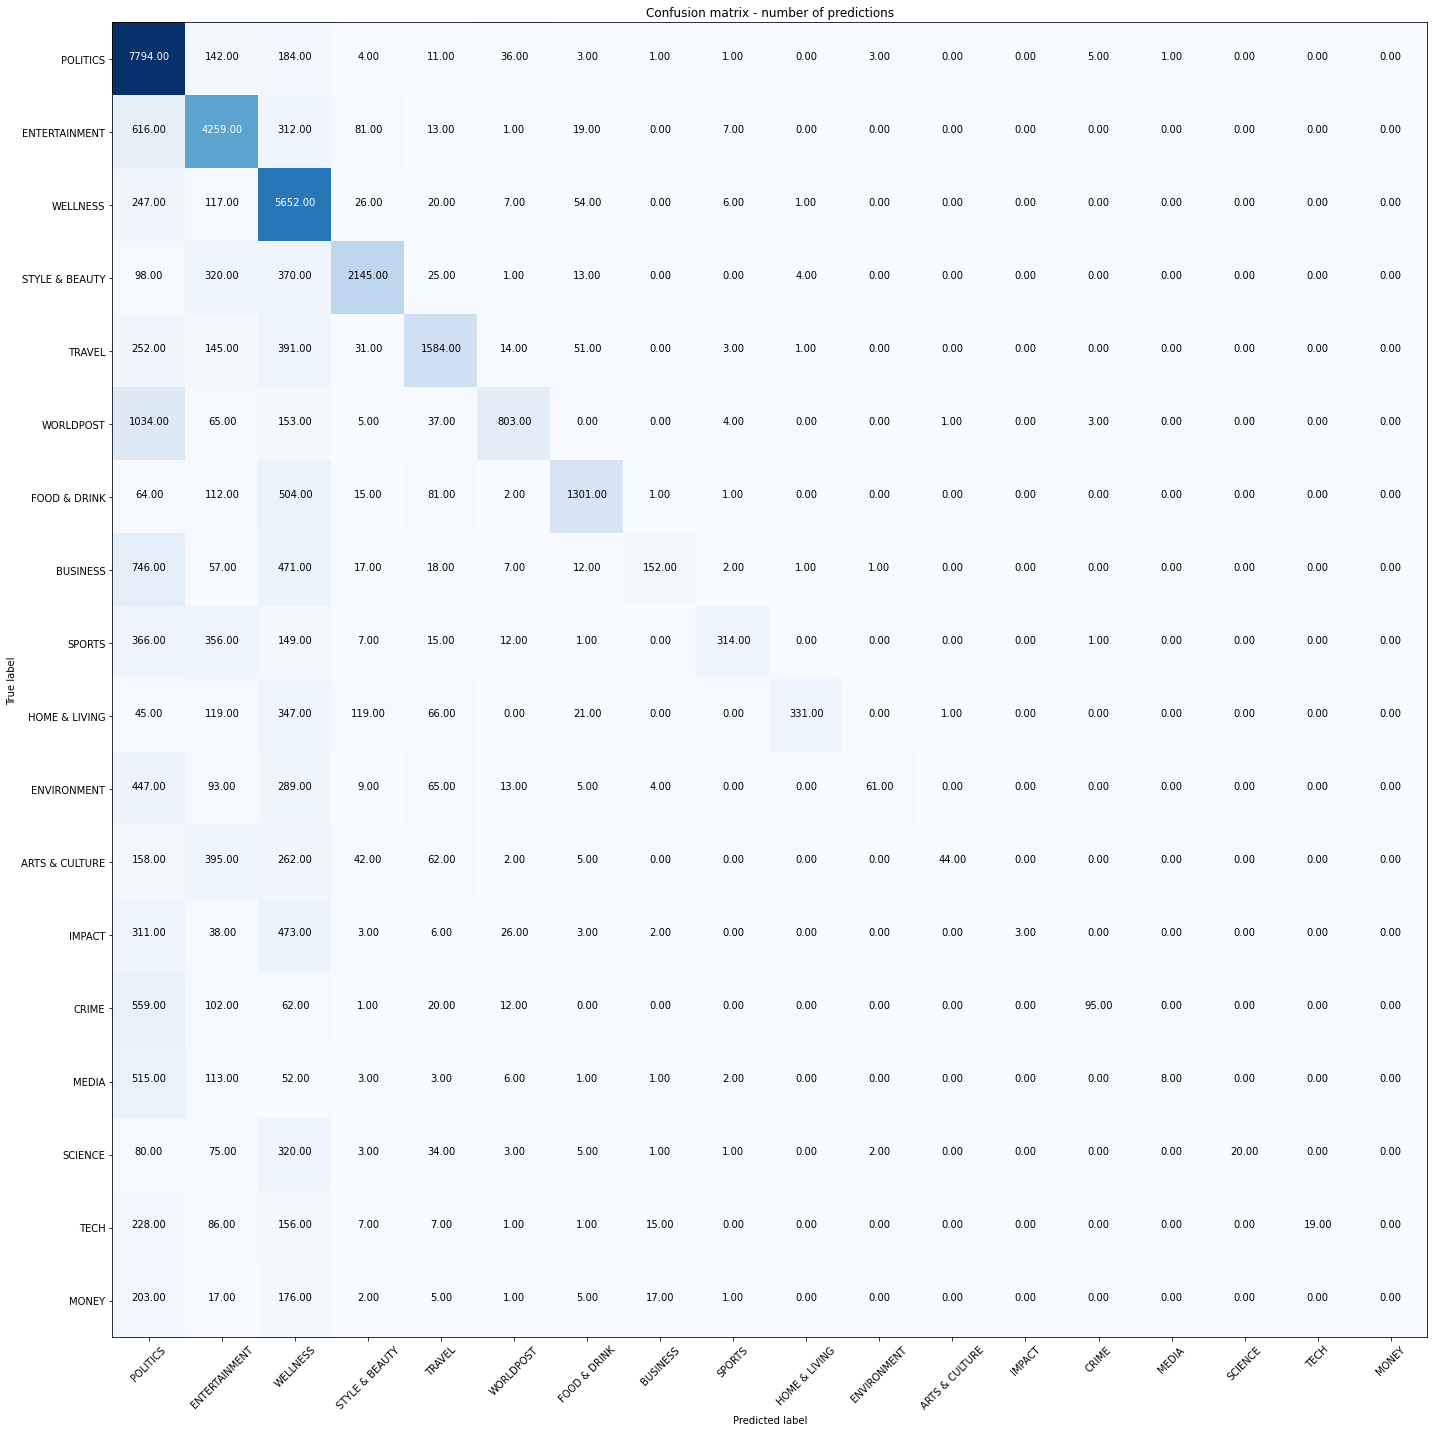

In [51]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# SGDClassifier

In [52]:
sgdc_model=SGDClassifier()

## Bag of words ngram range (1,1)

In [53]:
X_train,X_test,y_train,y_test= train_test_split(text_bow, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [54]:

sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [55]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow_train_accuracy = accuracy_score(y_train, y_pred_train)
sgdc_bow_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8348480691405447
ACC test set: 0.7371778383661711


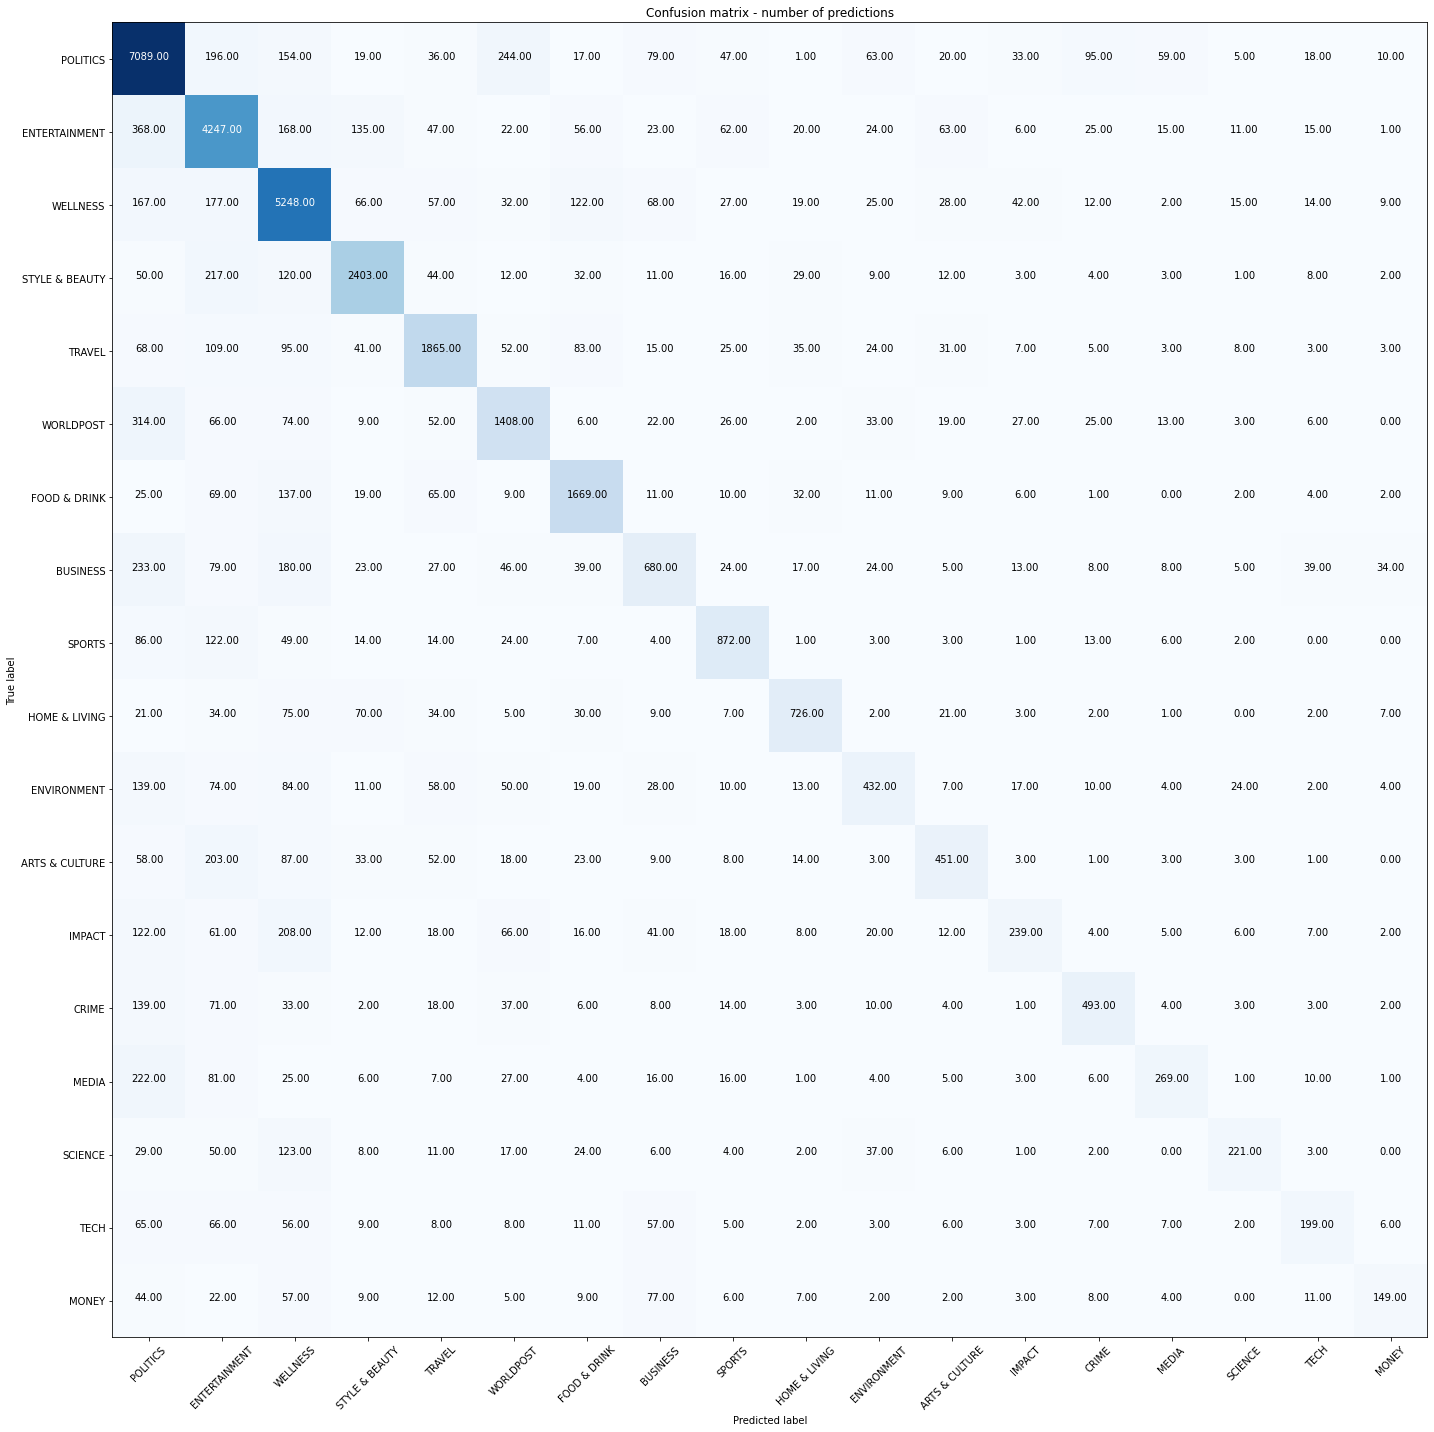

In [56]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram range(1,2)

In [57]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [58]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [59]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow2_train_accuracy = accuracy_score(y_train, y_pred_train)
sgdc_bow2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8842941902736813
ACC test set: 0.7451772210504656


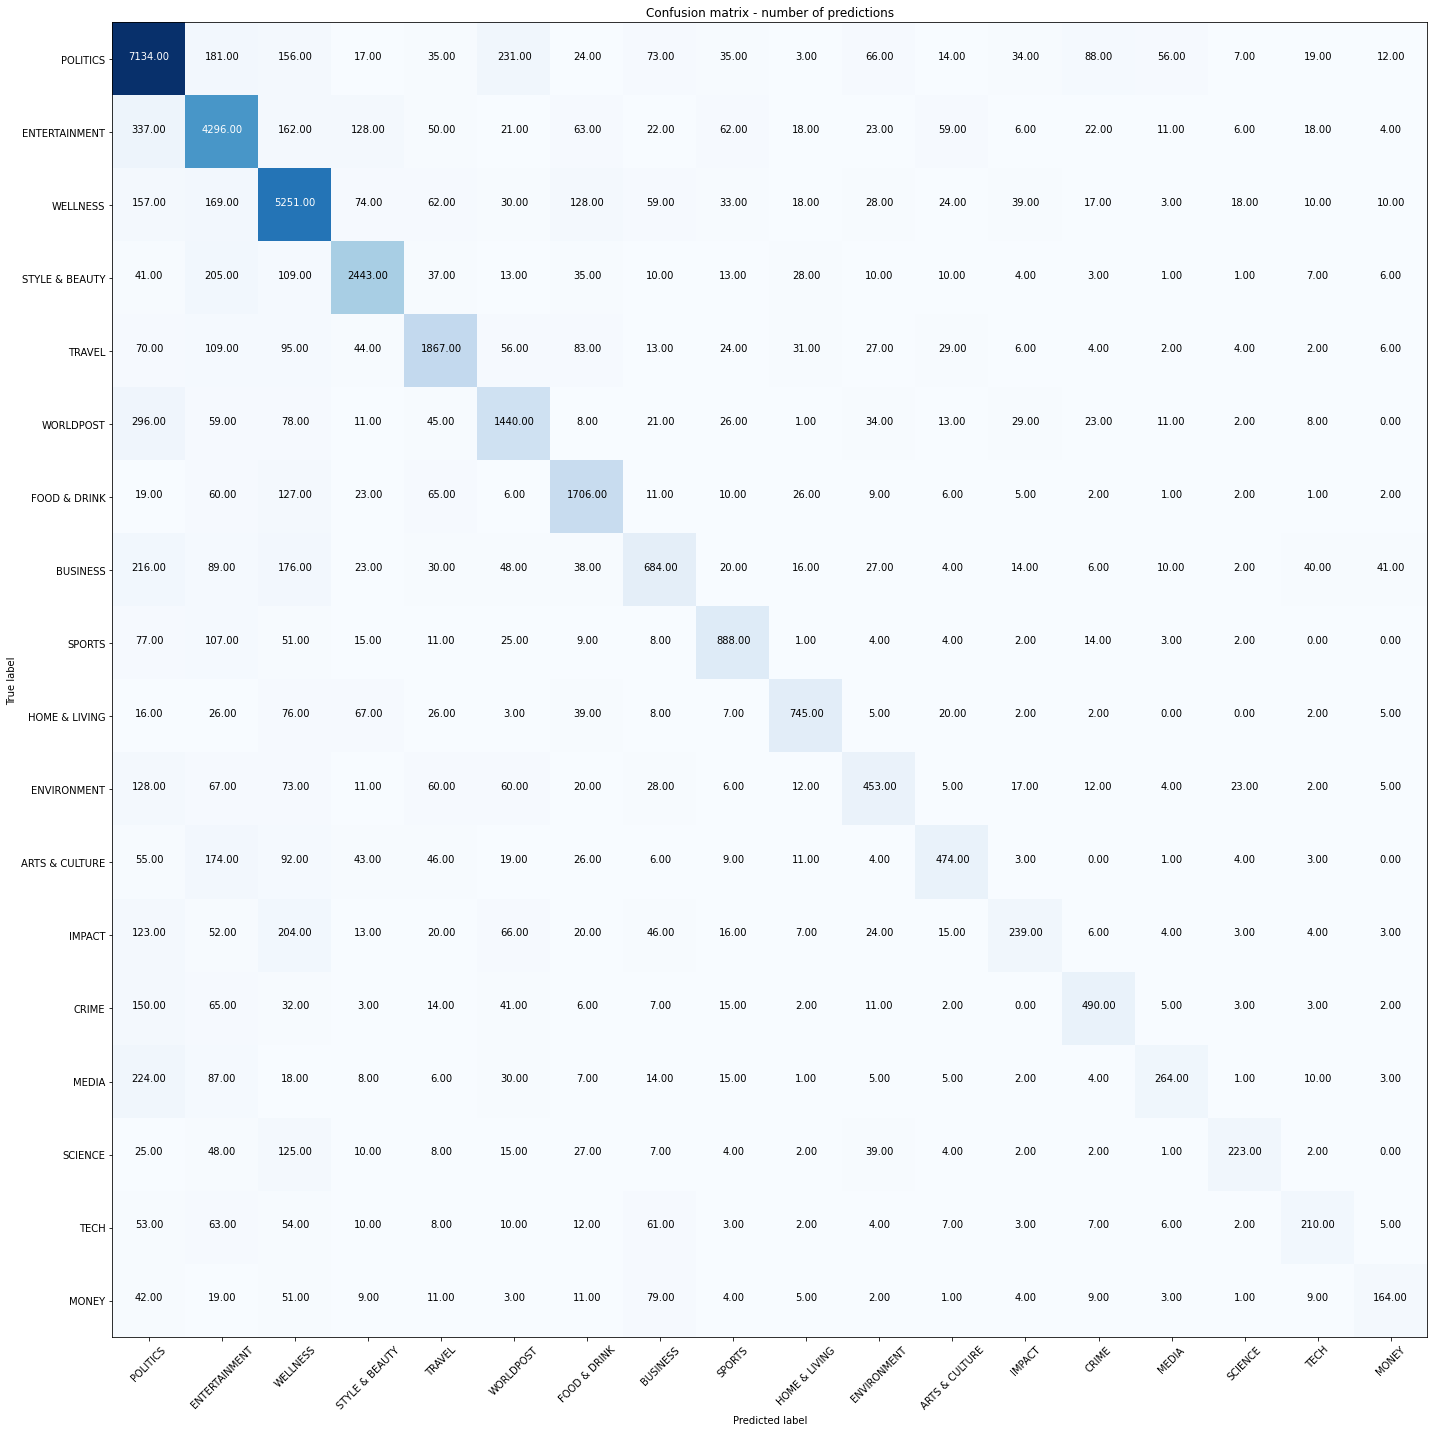

In [60]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Stratified Kfold

In [61]:
#Stratified kdol for bag of words ngram ranGE (1,2)
X, y = text_bow2, df['category']
metrics_train = []
metrics_test = []

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    sgdc_model.fit(X_train, y_train)
    y_pred_train= sgdc_model.predict(X_train)
    y_pred = sgdc_model.predict(X_test)

    metrics_train.append(accuracy_score(y_train,y_pred_train))
    metrics_test.append(accuracy_score(y_test, y_pred))

metrics_train = np.array(metrics_train)
metrics_test = np.array(metrics_test)
print('Mean accuracy train: ', np.mean(metrics_train, axis=0))
print('Std for accuracy: ', np.std(metrics_train, axis=0))
print('Mean accuracy test: ', np.mean(metrics_test, axis=0))
print('Std for accuracy: ', np.std(metrics_test, axis=0))

Mean accuracy train:  0.8803935438235483
Std for accuracy:  0.003221298364470709
Mean accuracy test:  0.7159089447623947
Std for accuracy:  0.031149651914615665


## Tfidf ngram range(1,1)

In [62]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [63]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [64]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_tfidf_train_accuracy = accuracy_score(y_train, y_pred_train)
sgdc_tfidf_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7637612319089101
ACC test set: 0.717603786202994


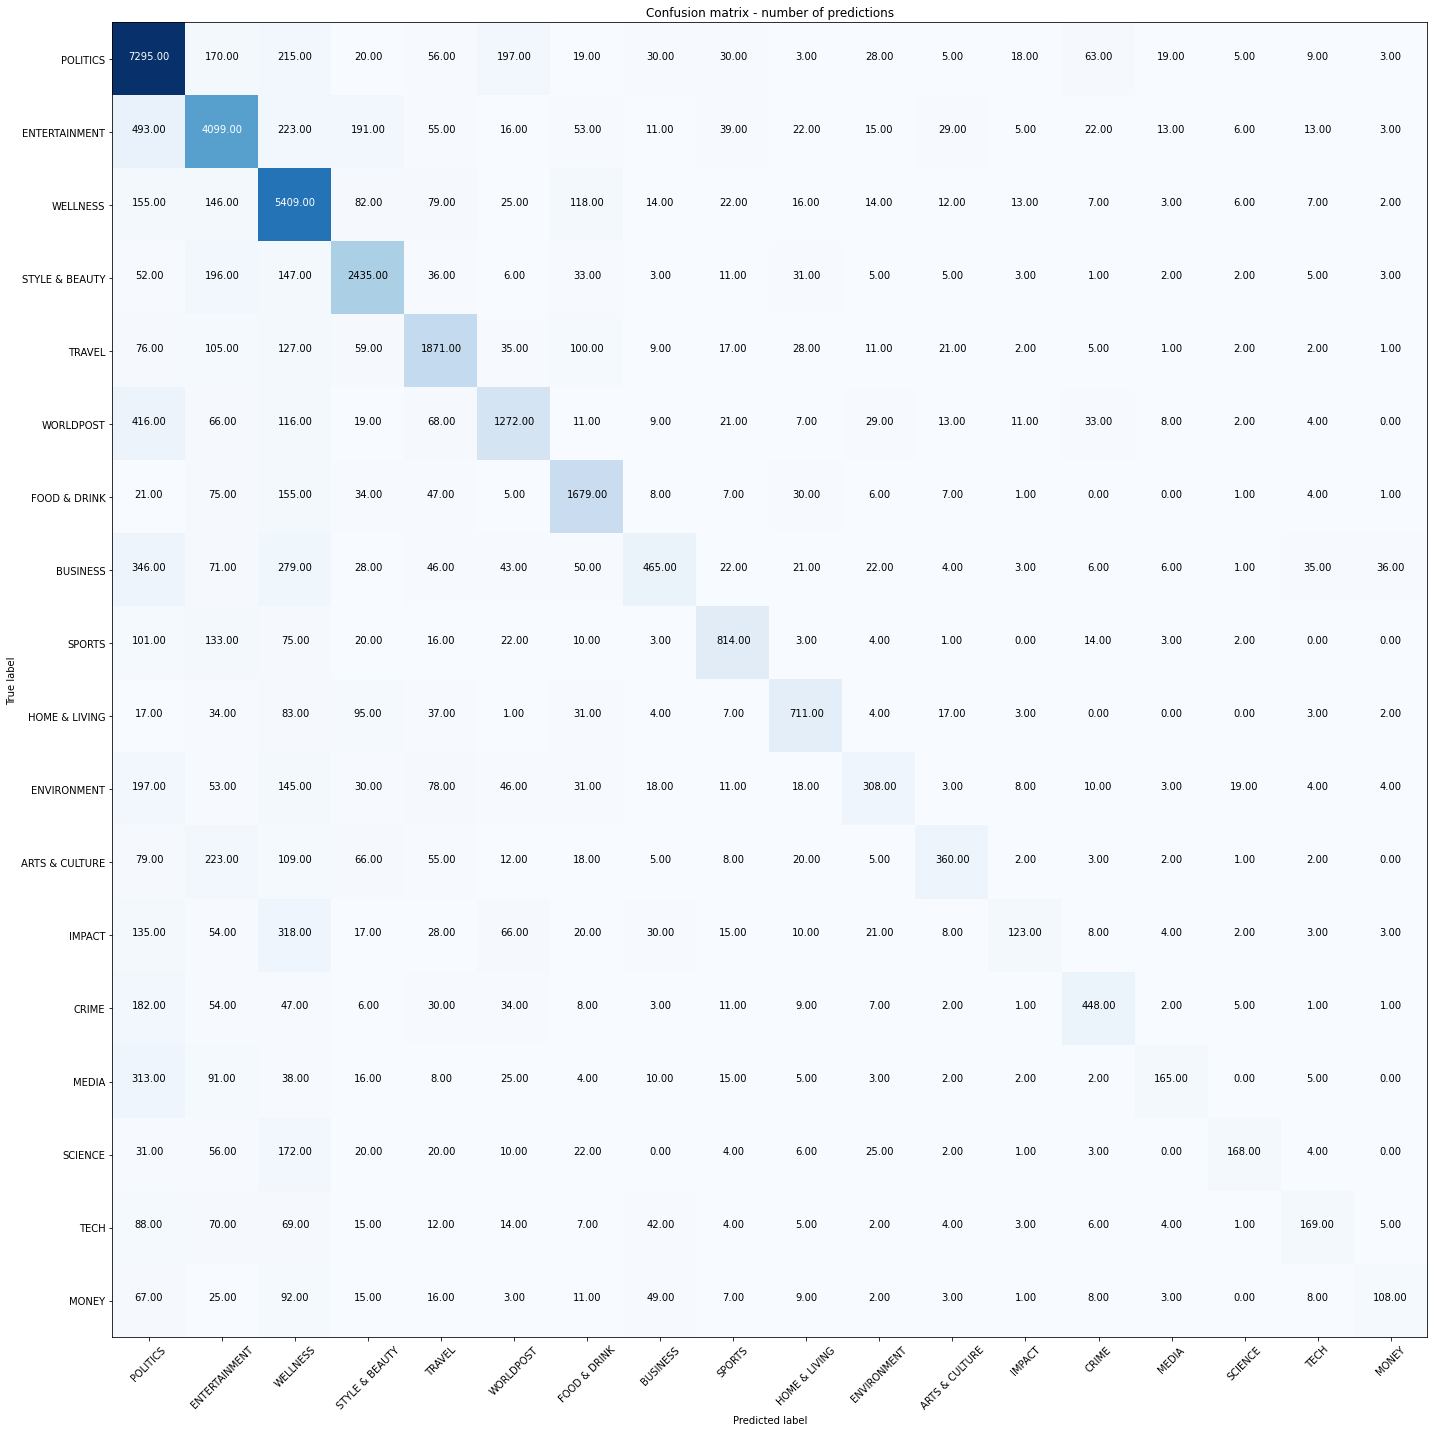

In [65]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Tfidf ngram range (1,2)

In [66]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf2, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [67]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [68]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_tfidf2_train_accuracy = accuracy_score(y_train, y_pred_train)
sgdc_tfidf2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7830012346525825
ACC test set: 0.7223108184577396


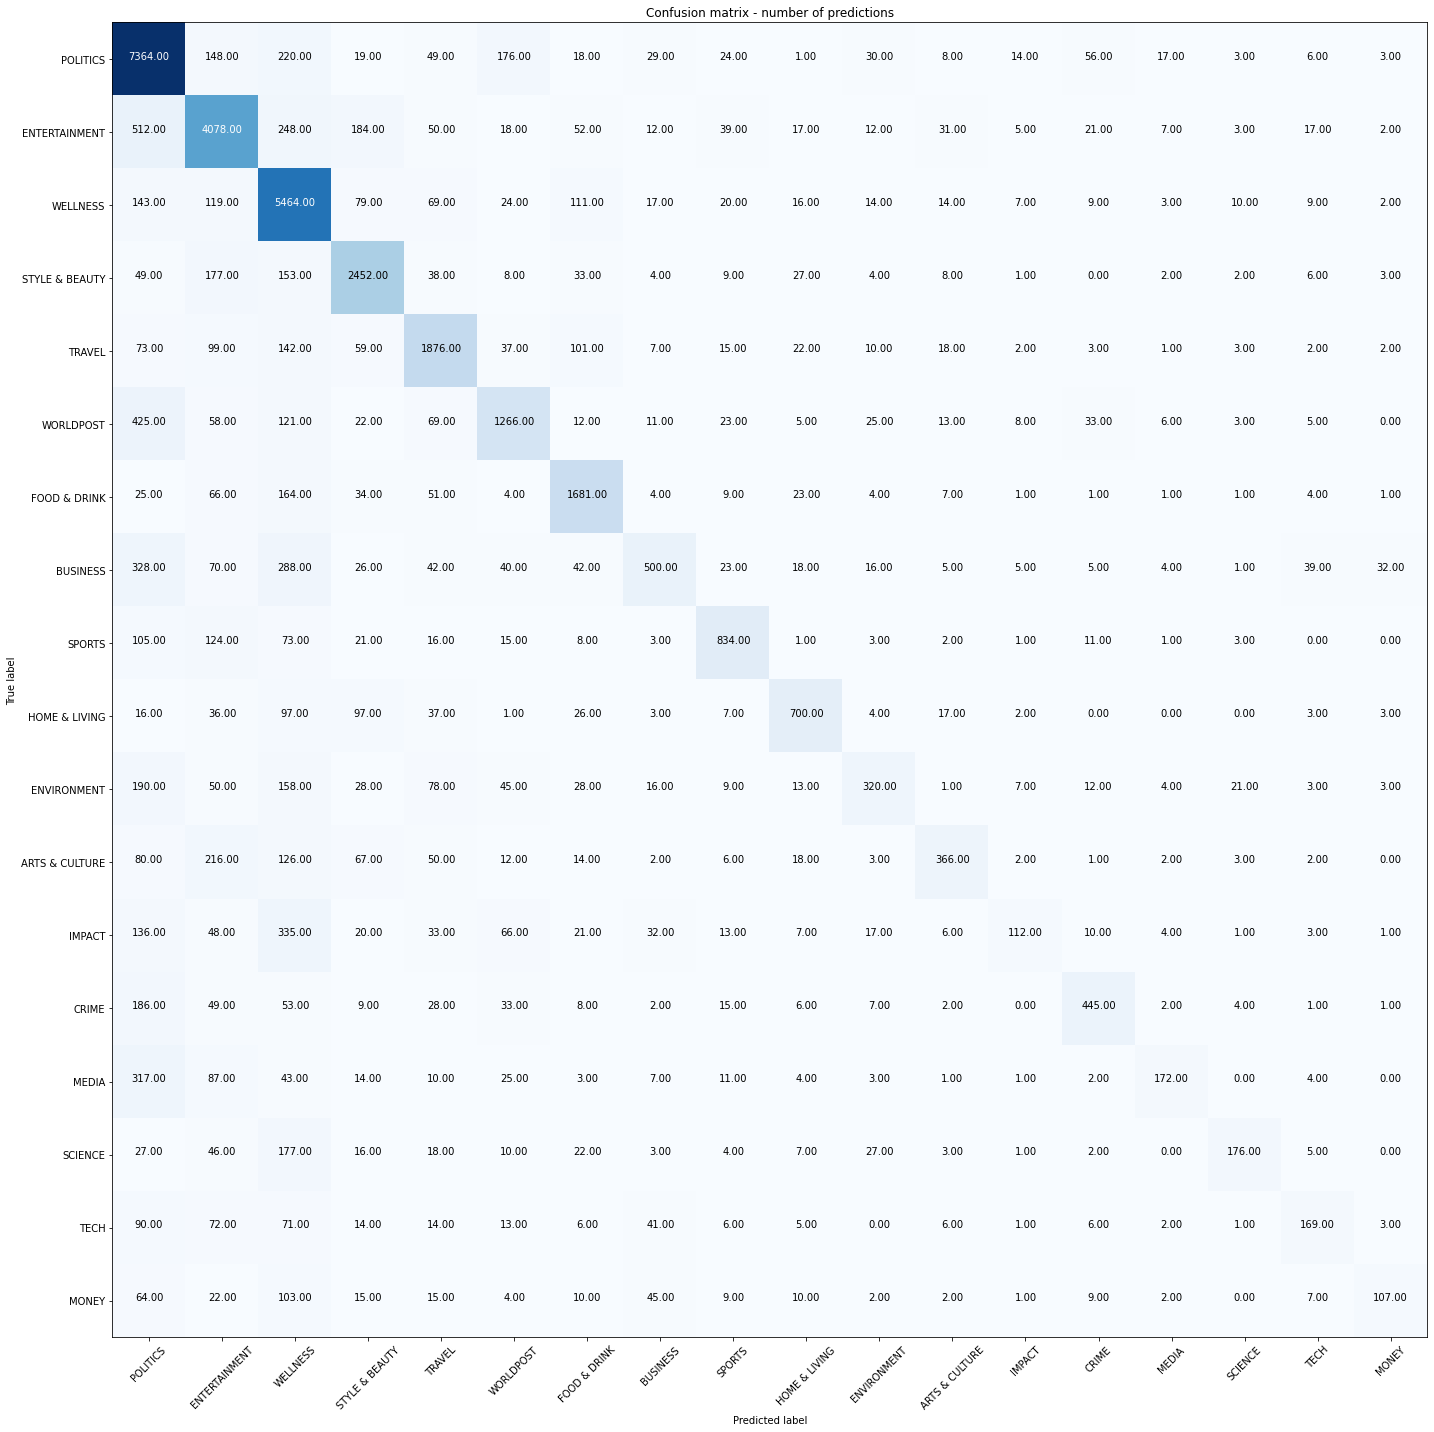

In [69]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Logistic Regression

In [70]:
lr= LogisticRegression()


## Bag of words ngram range (1,1)

In [71]:
X_train,X_test,y_train,y_test= train_test_split(text_bow, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [72]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [73]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

lr_bow_train_accuracy = accuracy_score(y_train, y_pred_train)
lr_bow_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9113965292544071
ACC test set: 0.7258861052523278


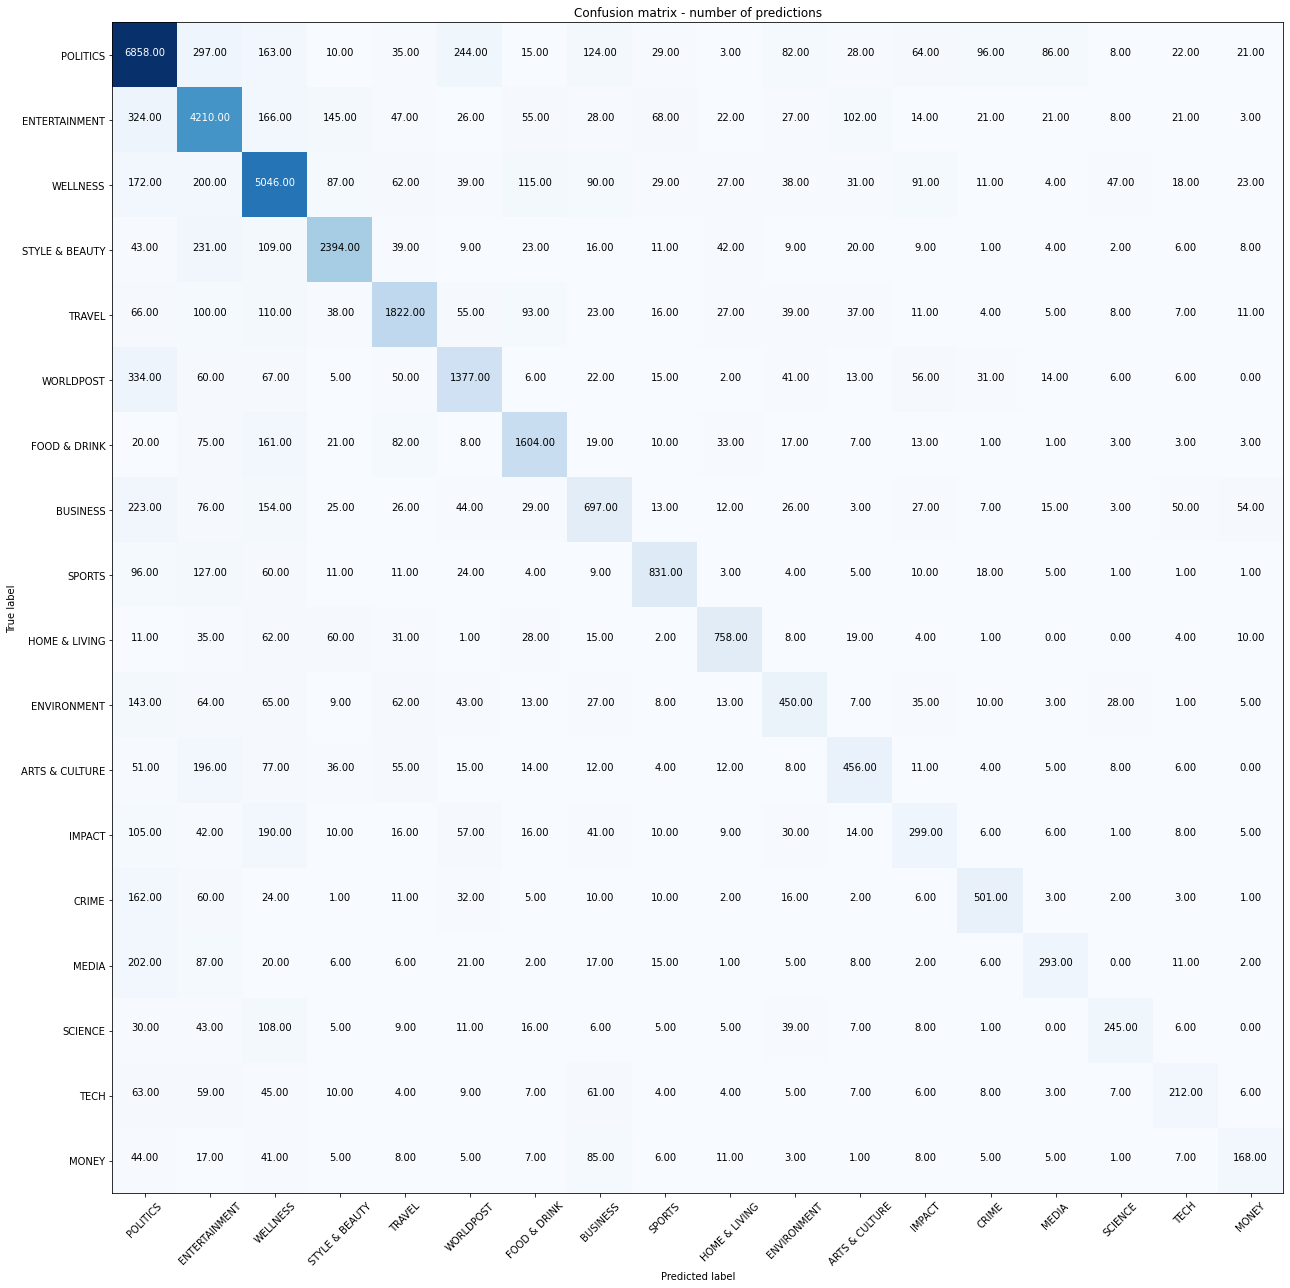

In [74]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram range (1,2)

In [75]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [76]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [77]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

lr_bow2_train_accuracy = accuracy_score(y_train, y_pred_train)
lr_bow2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9724432402771109
ACC test set: 0.738926899531869


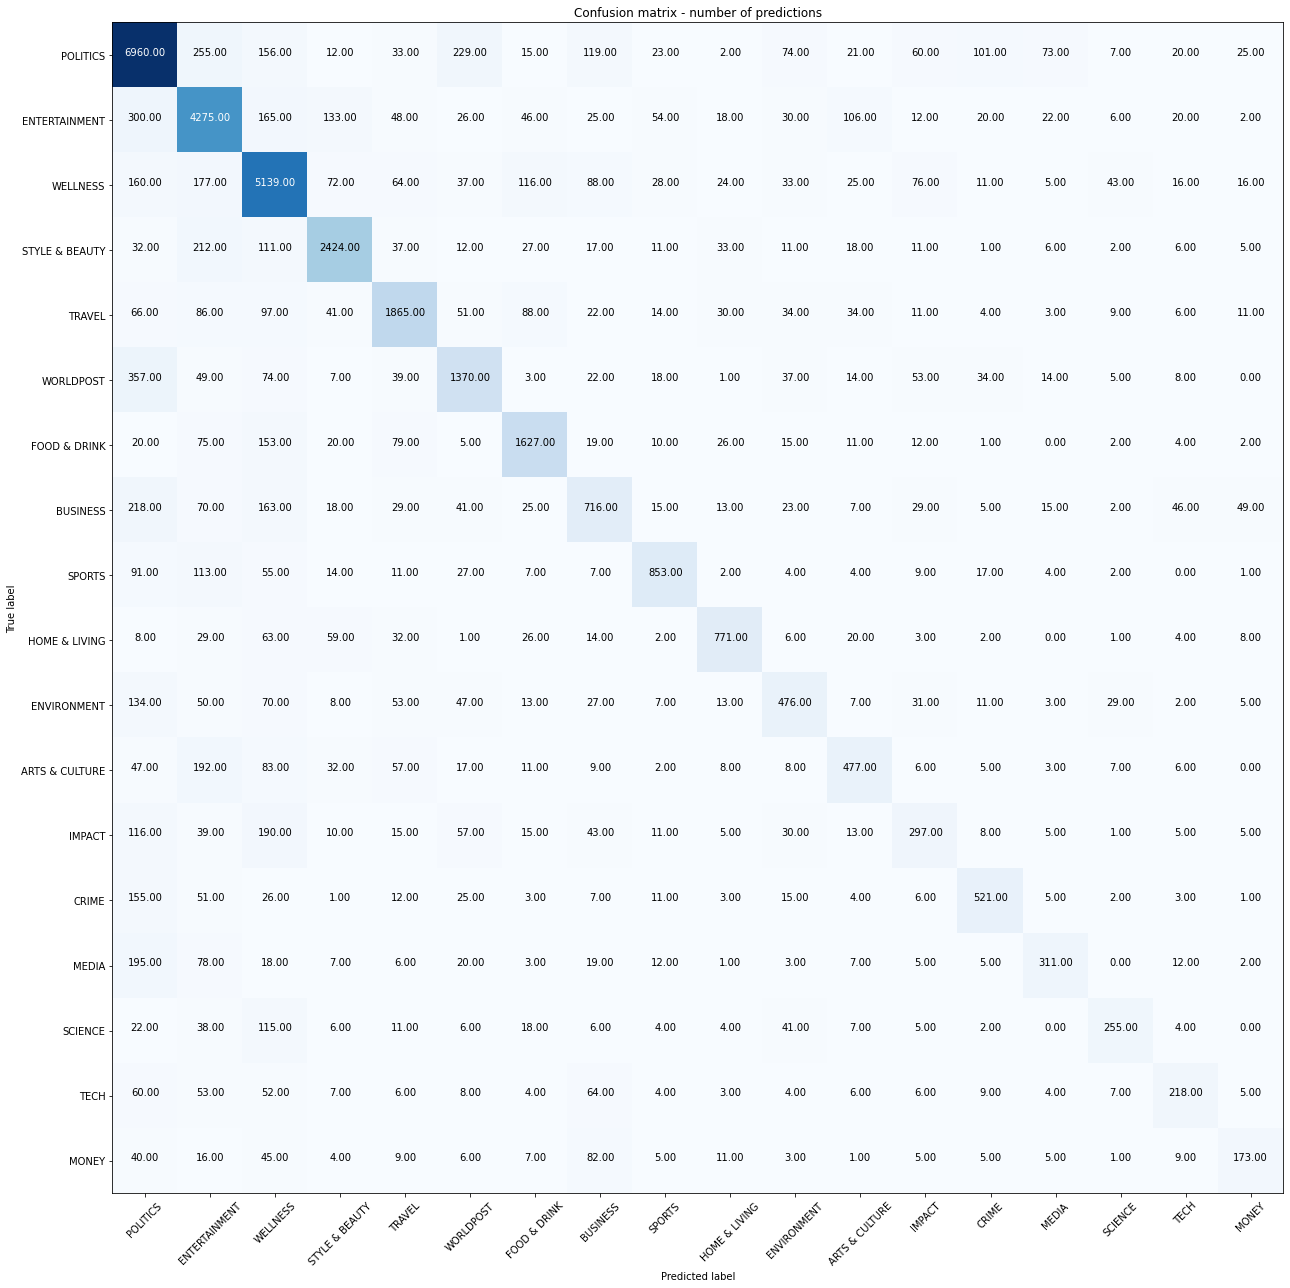

In [78]:

labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Stratified kfold


In [79]:
from sklearn.model_selection import StratifiedKFold

In [80]:
X, y = text_bow2, df['category']
metrics_train = []
metrics_test = []

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

  
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_train= lr.predict(X_train)
    y_pred = lr.predict(X_test)

    metrics_train.append(accuracy_score(y_train,y_pred_train))
    metrics_test.append(accuracy_score(y_test, y_pred))

metrics_train = np.array(metrics_train)
metrics_test = np.array(metrics_test)
print('Mean accuracy train: ', np.mean(metrics_train, axis=0))
print('Std for accuracy: ', np.std(metrics_train, axis=0))
print('Mean accuracy test: ', np.mean(metrics_test, axis=0))
print('Std for accuracy: ', np.std(metrics_test, axis=0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean accuracy train:  0.9699038647032344
Std for accuracy:  0.002470622387317448
Mean accuracy test:  0.7044305832422352
Std for accuracy:  0.030574897460198345


## Tfidf ngram range (1,1)

In [81]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [82]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [83]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

lr_tfidf_train_accuracy = accuracy_score(y_train, y_pred_train)
lr_tfidf_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7936329652239522
ACC test set: 0.7384381912649828


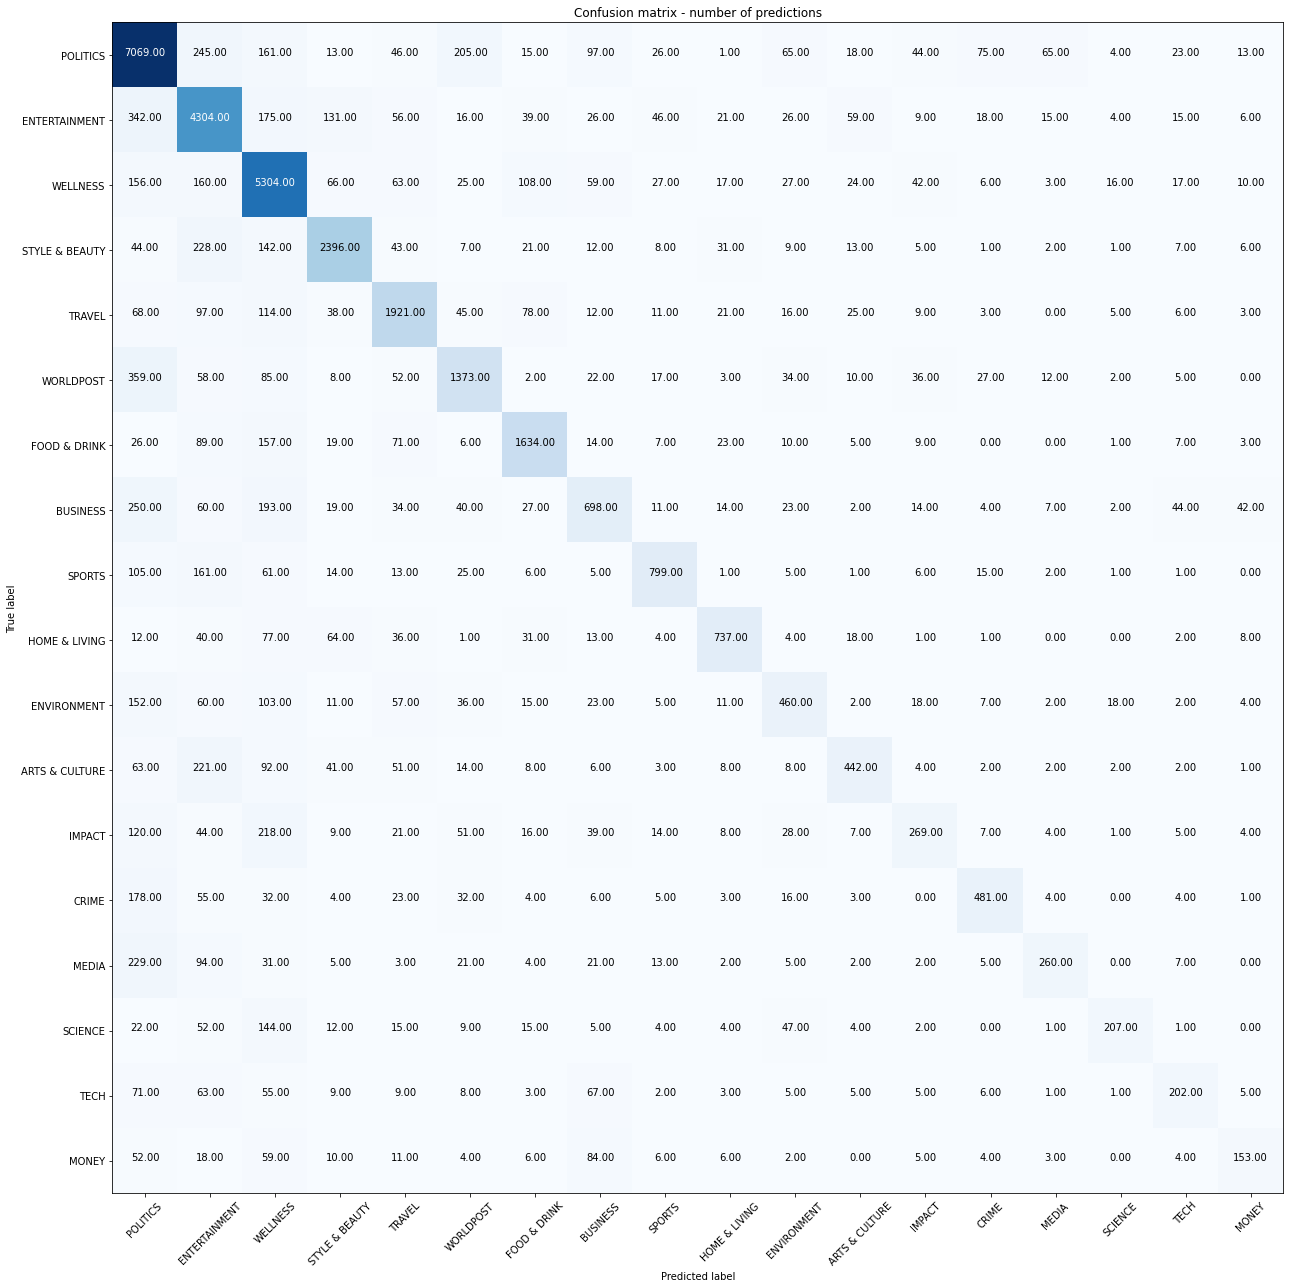

In [84]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

##Tfidf ngram range (1,2)

In [85]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf2, df['category'], test_size=0.25, stratify=df['category'])

In [88]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [89]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

lr_tfidf2_train_accuracy = accuracy_score(y_train, y_pred_train)
lr_tfidf2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8198093147678167
ACC test set: 0.7414476053294923


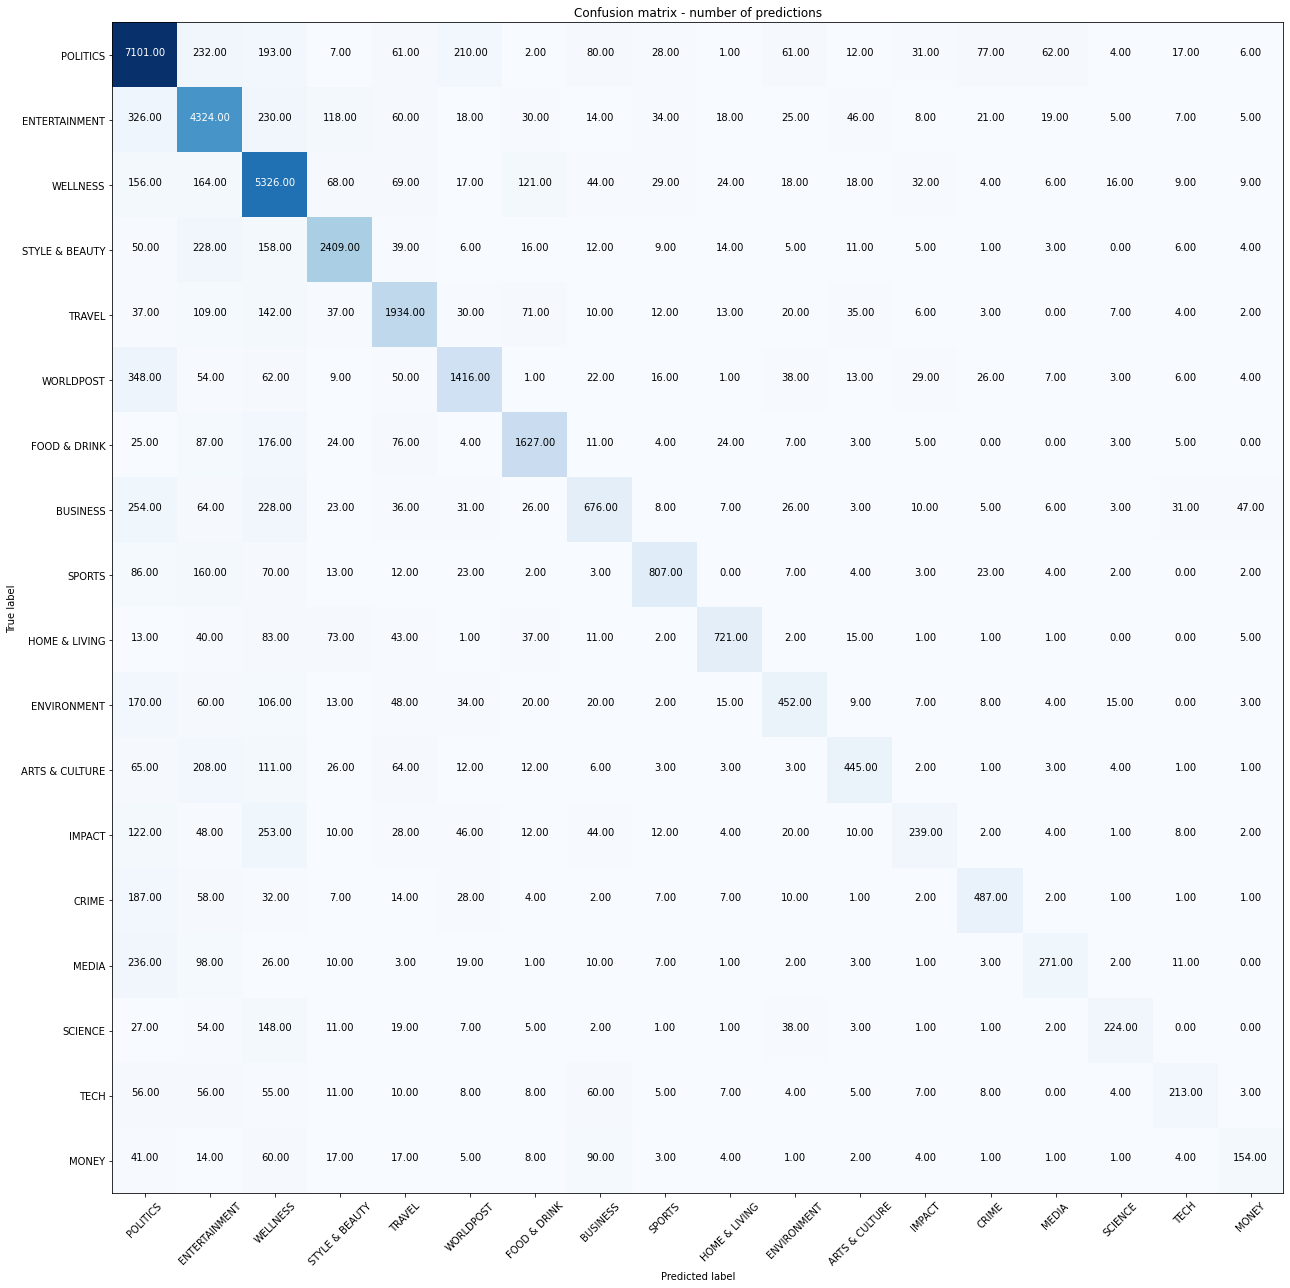

In [90]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Random Forest

In [ ]:
rfc= RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Bag of words ngram range (1,1)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(text_bow, df['category'], test_size=0.25, stratify=df['category'])

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

rfc_bow_acc_train = accuracy_score(y_train, y_pred_train)
rfc_bow_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9996227450442418
ACC test set: 0.6615823859252019


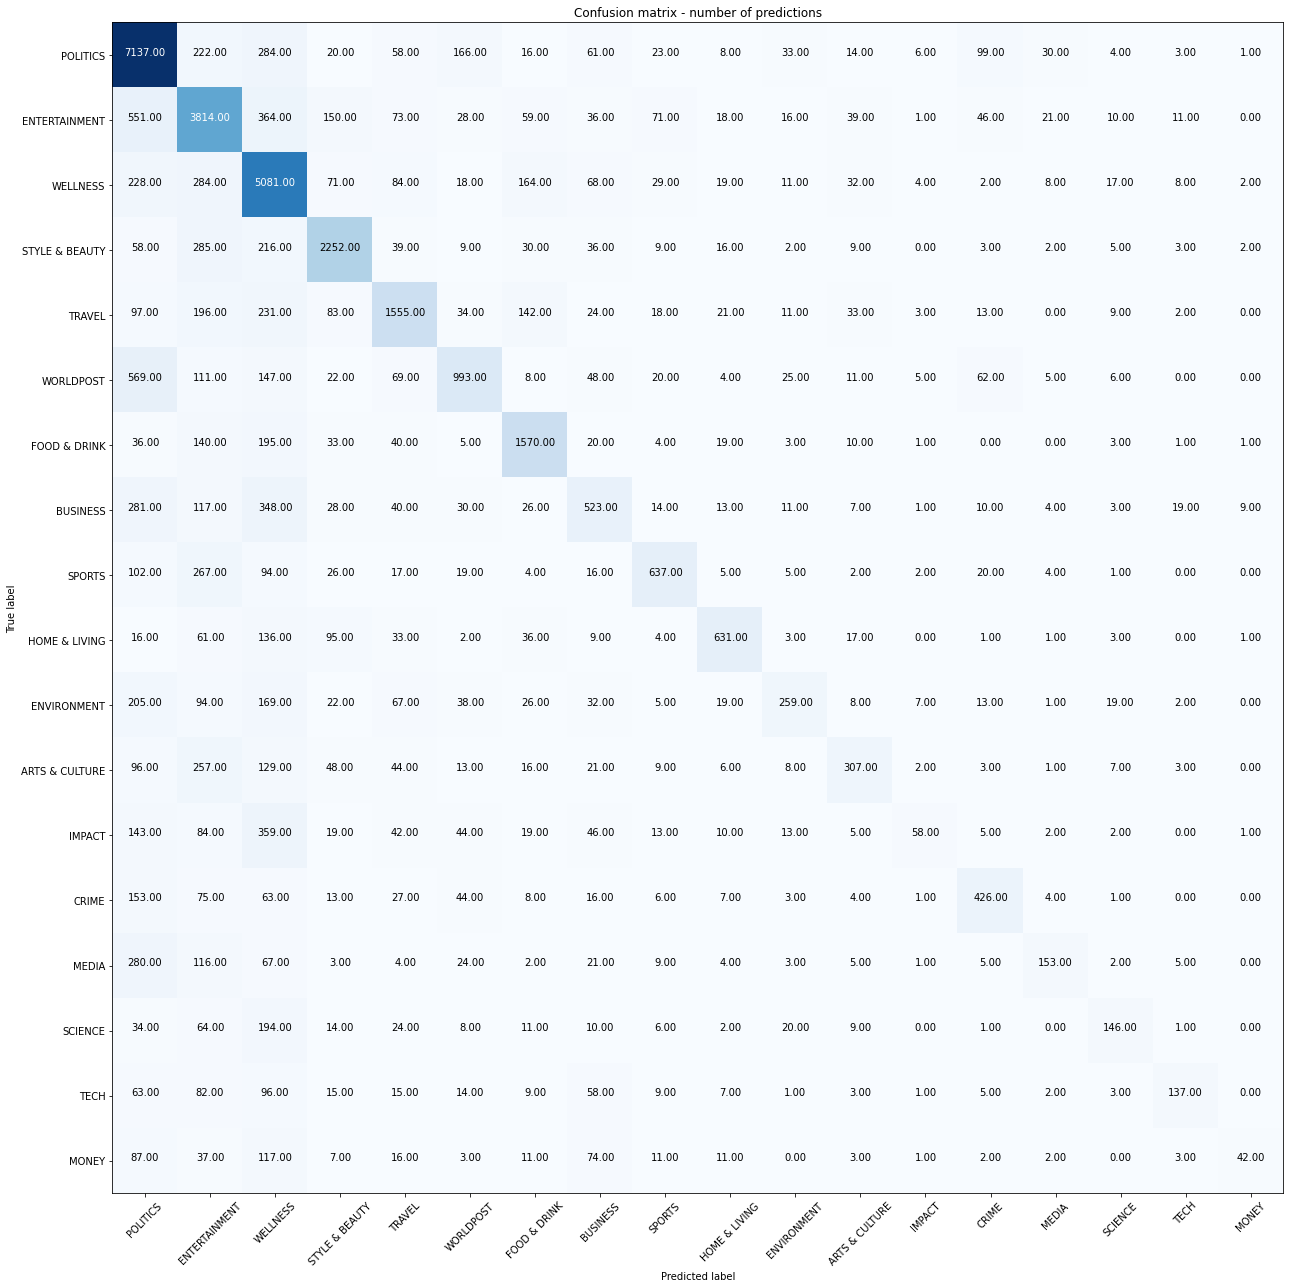

In [ ]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram range (1,2)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2, df['category'], test_size=0.25, stratify=df['category'])

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

rfc_bow2_acc_train = accuracy_score(y_train, y_pred_train)
rfc_bow2_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9996570409493106
ACC test set: 0.6672153917382582


In [ ]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(18,18))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Removing "Donald Trump" 

In [ ]:
from sklearn.feature_extraction import text

In [ ]:
my_stop_words=text.ENGLISH_STOP_WORDS.union(['donald','trump','donald trump'])

In [ ]:
my_stop_words

In [ ]:
bow=CountVectorizer(min_df=5, max_df=0.3,stop_words=my_stop_words)

In [ ]:
text_bow_notrump = bow.fit_transform(text_lemma)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(text_bow_notrump, df['category'], test_size=0.25, stratify=df['category'])

In [ ]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bownotrump_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_bownotrump_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7863965292544071
ACC test set: 0.7283810895622203


In [ ]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [ ]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bownotrump_train_accuracy = accuracy_score(y_train, y_pred_train)
sgdc_bownotrump_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8299437547156869
ACC test set: 0.7337826019856989


In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

lr_bownotrump_train_accuracy = accuracy_score(y_train, y_pred_train)
lr_bownotrump_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9056776870841622
ACC test set: 0.7223108184577396


# Grid search


In [91]:
from sklearn.model_selection import GridSearchCV

## Logistic regression

In [95]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [105]:
params={
    'C':[0.001,0.01,0.1,1,10,100],
    'multi_class':['multinomial']
    }

In [107]:
logreg=GridSearchCV(lr, params, cv=5, verbose=1, n_jobs=-1)

In [108]:
logreg.fit(X_train,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'multi_class': ['multinomial']},
             verbose=1)

In [109]:
print('grid search best params', logreg.best_params_)
print('accuracy', logreg.best_score_)

grid search best params {'C': 1, 'multi_class': 'multinomial'}
accuracy 0.7356643200185239


## SGDClassifier

In [110]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [112]:
params = {
    'loss' : ['hinge', 'log', 'squared_hinge'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'penalty' : ['l2', 'l1']

}
sgdc_grid = GridSearchCV(sgdc_model, params, cv=5 ,n_jobs=-1)

In [ ]:
sgdc_grid.fit(X_train,y_train)

In [114]:
print('grid search best params', sgdc_grid.best_params_)
print('accuracy', sgdc_grid.best_score_)

grid search best params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
accuracy 0.7418290132211055


# Results per model and vectorization type

In [ ]:
print('MultinomialNB BOW ngram (1,1) accuracy')
print(f'dla train {nb_bow_train_accuracy}')
print(f'dla test  {nb_bow_test_accuracy}')
print('-'*50)

print('MultinomialNB BOW ngram (1,2) accuracy')
print(f'dla train {nb_bow2_train_accuracy}')
print(f'dla test  {nb_bow2_test_accuracy}')
print('-'*50)

print('MultinomialNB TFIDF ngram (1,1) accuracy')
print(f'dla train {nb_tfidf_train_accuracy}')
print(f'dla test  {nb_tfidf_test_accuracy}')
print('-'*50)

print('MultinomialNB TFIDF ngram (1,2) accuracy')
print(f'dla train {nb_tfidf2_train_accuracy}')
print(f'dla test  {nb_tfidf2_test_accuracy}')
print('-'*50)

print('Logistic Regression BOW ngram(1,1) accuracy')
print(f'dla train {lr_bow_train_accuracy}')
print(f'dla test  {lr_bow_test_accuracy}')
print('-'*50)

print('Logistic Regression BOW ngram(1,2) accuracy')
print(f'dla train {lr_bow2_train_accuracy}')
print(f'dla test  {lr_bow2_test_accuracy}')
print('-'*50)

print('Logistic Regression TFIDF ngram(1,1) accuracy')
print(f'dla train {lr_tfidf_train_accuracy}')
print(f'dla test  {lr_tfidf_test_accuracy}')
print('-'*50)

print('Logistic Regression TFIDF ngram(1,2) accuracy')
print(f'dla train {lr_tfidf2_train_accuracy}')
print(f'dla test  {lr_tfidf2_test_accuracy}')
print('-'*50)

print('SGDClassifier BOW ngram(1,1) accuracy')
print(f'dla train {sgdc_bow_train_accuracy}')
print(f'dla test  {sgdc_bow_test_accuracy}')
print('-'*50)

print('SGDClassifier BOW ngram(1,2) accuracy')
print(f'dla train {sgdc_bow2_train_accuracy}')
print(f'dla test  {sgdc_bow2_test_accuracy}')
print('-'*50)

print('SGDClassifier TFIDF ngram(1,1) accuracy')
print(f'dla train {sgdc_tfidf_train_accuracy}')
print(f'dla test  {sgdc_tfidf_test_accuracy}')
print('-'*50)

print('SGDClassifier TFIDF ngram(1,2) accuracy')
print(f'dla train {sgdc_tfidf2_train_accuracy}')
print(f'dla test  {sgdc_tfidf_test_accuracy}')
print('-'*50)
